In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

import matplotlib.ticker as mtick

In [66]:
from google.colab import files
uploaded = files.upload()

Saving inflacion_2007_2025_julio.csv to inflacion_2007_2025_julio (1).csv


In [67]:
df = pd.read_csv('inflacion_2007_2025_julio.csv')

In [68]:
df

,Unnamed: 0,Fecha,Valor
0,NaN,31/01/2007,"1,1"
1,NaN,28/02/2007,"0,3"
2,NaN,31/03/2007,"0,8"
3,NaN,30/04/2007,"0,7"
4,NaN,31/05/2007,"0,4"
...,...,...,...
218,NaN,31/03/2025,"3,7"
219,NaN,30/04/2025,"2,8"
220,NaN,31/05/2025,"1,5"
221,NaN,30/06/2025,"1,6"


¿Qué niveles de inflación se registraron anualmente entre 2007 y 2024?



In [69]:
#elimnino la columna (Unnamed: 0)
df = df.drop(columns='Unnamed: 0')

In [70]:
#cambio el formato de la fecha a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

/tmp/ipython-input-1320504100.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha'] = pd.to_datetime(df['Fecha'])


In [71]:
#cambio el nombre de la columna
df.rename(columns={'Valor' : 'Inflacion mensual'}, inplace=True)

In [72]:
#cambio  Inflacion mensual a float, primero reemplasa las comas por punto y luego paso a float
df['Inflacion mensual'] = df['Inflacion mensual'].astype(str).str.replace(',','.').astype(float)

In [73]:
# creo columna año
df['Año'] = df['Fecha'].dt.year

In [74]:
#creo la columna factor mensual
df['factor mensual'] = 1 + (df['Inflacion mensual'] / 100)

In [75]:
#saco el producto
factor_anual_compuesto = df.groupby('Año')['factor mensual'].prod()

In [76]:
# Inflación anual en porcentaje
inflacion_anual = ( factor_anual_compuesto - 1) * 100

In [77]:

inflacion_anual = inflacion_anual.reset_index()
#renombre la columna
inflacion_anual.columns = ['Año', 'Inflacion anual (%)']

In [78]:
inflacion_anual

,Año,Inflacion anual (%)
0,2007,8.404147
1,2008,7.118946
2,2009,7.333069
3,2010,10.469534
4,2011,9.163396
5,2012,10.580430
6,2013,10.687526
7,2014,23.697588
8,2015,18.463079
9,2016,33.075635


In [79]:
#filtro el año de 2007 a 2024
inflacion_anual_07_24 = inflacion_anual[(inflacion_anual['Año']>= 2007) & (inflacion_anual['Año'] <= 2024)]

In [80]:
año=inflacion_anual_07_24['Año']
inf=inflacion_anual_07_24['Inflacion anual (%)'].round(2)

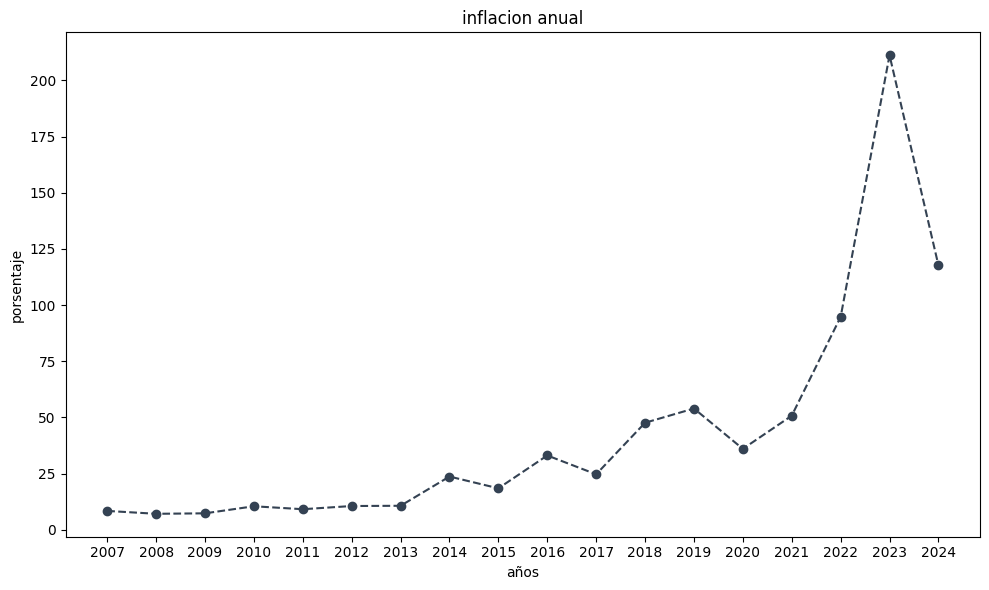

In [81]:
fig, ax= plt.subplots(figsize=(10, 6))

ax.plot(año, inf , linestyle='dashed',  marker='o', color='#344253')

ax.set_title('inflacion anual')
ax.set_xlabel('años')
ax.set_ylabel('porsentaje')

ax.set_xticks(año)

plt.tight_layout()
plt.show()



In [82]:
df

,Fecha,Inflacion mensual,Año,factor mensual
0,2007-01-31,1.1,2007,1.011
1,2007-02-28,0.3,2007,1.003
2,2007-03-31,0.8,2007,1.008
3,2007-04-30,0.7,2007,1.007
4,2007-05-31,0.4,2007,1.004
...,...,...,...,...
218,2025-03-31,3.7,2025,1.037
219,2025-04-30,2.8,2025,1.028
220,2025-05-31,1.5,2025,1.015
221,2025-06-30,1.6,2025,1.016


¿Cómo varió el promedio de inflación mensual entre 2020 y 2023?



In [83]:
#creo una nueva columna (mes)
df['Mes'] = df['Fecha'].dt.month
#creo una nueva columna (mes nombres)
df['Mes nombre'] = df['Fecha'].dt.month_name()

In [84]:
#filtro del años 2018 a 2024
filtro_años = df[(df['Año'] >=2020 ) & (df['Año'] <=2024 )][['Año','Mes','Mes nombre','Inflacion mensual']]


In [85]:
#agrupo la inflacion por años
promedio = filtro_años.groupby(['Mes','Mes nombre'])['Inflacion mensual'].mean().reset_index()
promedio

,Mes,Mes nombre,Inflacion mensual
0,1,January,7.36
1,2,February,6.02
2,3,March,6.70
3,4,April,5.76
4,5,May,4.38
5,6,June,4.26
6,7,July,4.52
7,8,August,5.76
8,9,September,5.74
9,10,October,4.92


In [86]:
#elimino la columna mes numero 1,2,3,4
promedio = promedio.drop(columns='Mes')
promedio

,Mes nombre,Inflacion mensual
0,January,7.36
1,February,6.02
2,March,6.70
3,April,5.76
4,May,4.38
5,June,4.26
6,July,4.52
7,August,5.76
8,September,5.74
9,October,4.92


In [87]:
m = promedio['Mes nombre']
im = promedio['Inflacion mensual']

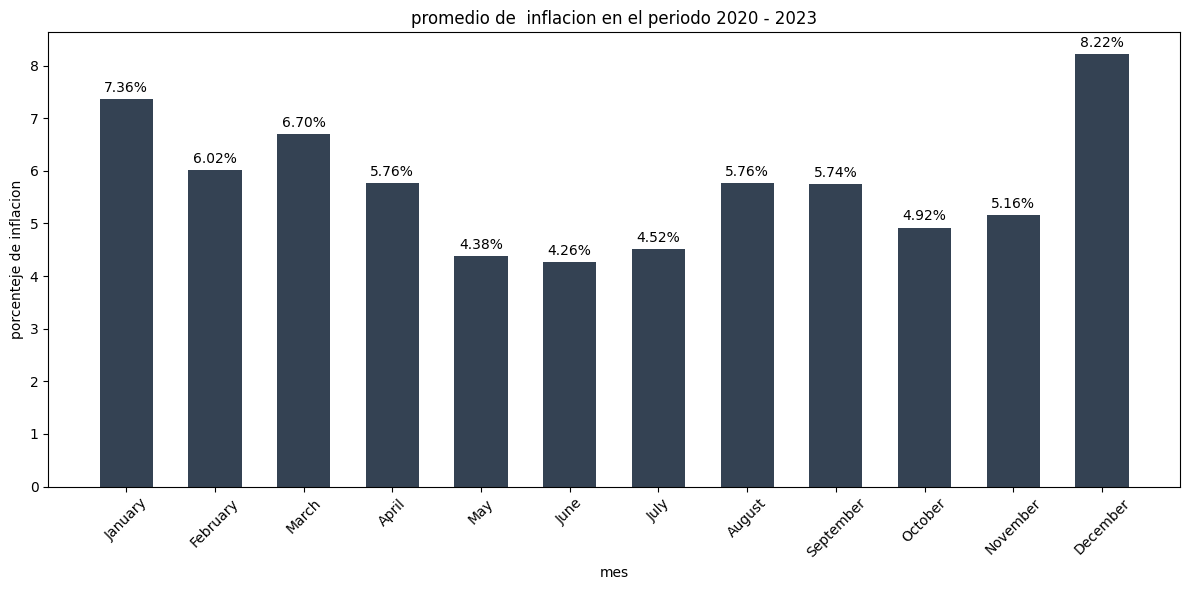

In [88]:
fig, ax = plt.subplots(figsize=(12, 6))

bar = ax.bar(m, im,  width=0.6,  color='#344253')
ax.set_title('promedio de  inflacion en el periodo 2020 - 2023')
ax.set_xlabel('mes')
ax.set_ylabel('porcenteje de inflacion')
ax.bar_label(bar, labels=[f"{v:.2f}%" for v in im], padding=3)

ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()



cual fue la inflacion mensual   del periodo 2022-2025  

In [89]:
#creo la columna mes año
df['Mes-Año'] = df['Fecha'].dt.strftime('%b-%Y')

In [90]:
df

,Fecha,Inflacion mensual,Año,factor mensual,Mes,Mes nombre,Mes-Año
0,2007-01-31,1.1,2007,1.011,1,January,Jan-2007
1,2007-02-28,0.3,2007,1.003,2,February,Feb-2007
2,2007-03-31,0.8,2007,1.008,3,March,Mar-2007
3,2007-04-30,0.7,2007,1.007,4,April,Apr-2007
4,2007-05-31,0.4,2007,1.004,5,May,May-2007
...,...,...,...,...,...,...,...
218,2025-03-31,3.7,2025,1.037,3,March,Mar-2025
219,2025-04-30,2.8,2025,1.028,4,April,Apr-2025
220,2025-05-31,1.5,2025,1.015,5,May,May-2025
221,2025-06-30,1.6,2025,1.016,6,June,Jun-2025


In [91]:
#filtro  mes_año y inflacion mensual desde el año 2022 al 2025
infla_mes_a_mes = df[(df['Año']>=2022)&(df['Año']<=2025)][['Mes-Año','Inflacion mensual']]
infla_mes_a_mes

,Mes-Año,Inflacion mensual
180,Jan-2022,3.9
181,Feb-2022,4.7
182,Mar-2022,6.7
183,Apr-2022,6.0
184,May-2022,5.1
185,Jun-2022,5.3
186,Jul-2022,7.4
187,Aug-2022,7.0
188,Sep-2022,6.2
189,Oct-2022,6.3


In [92]:
mes_año=infla_mes_a_mes['Mes-Año']
inf_mensual=infla_mes_a_mes['Inflacion mensual']

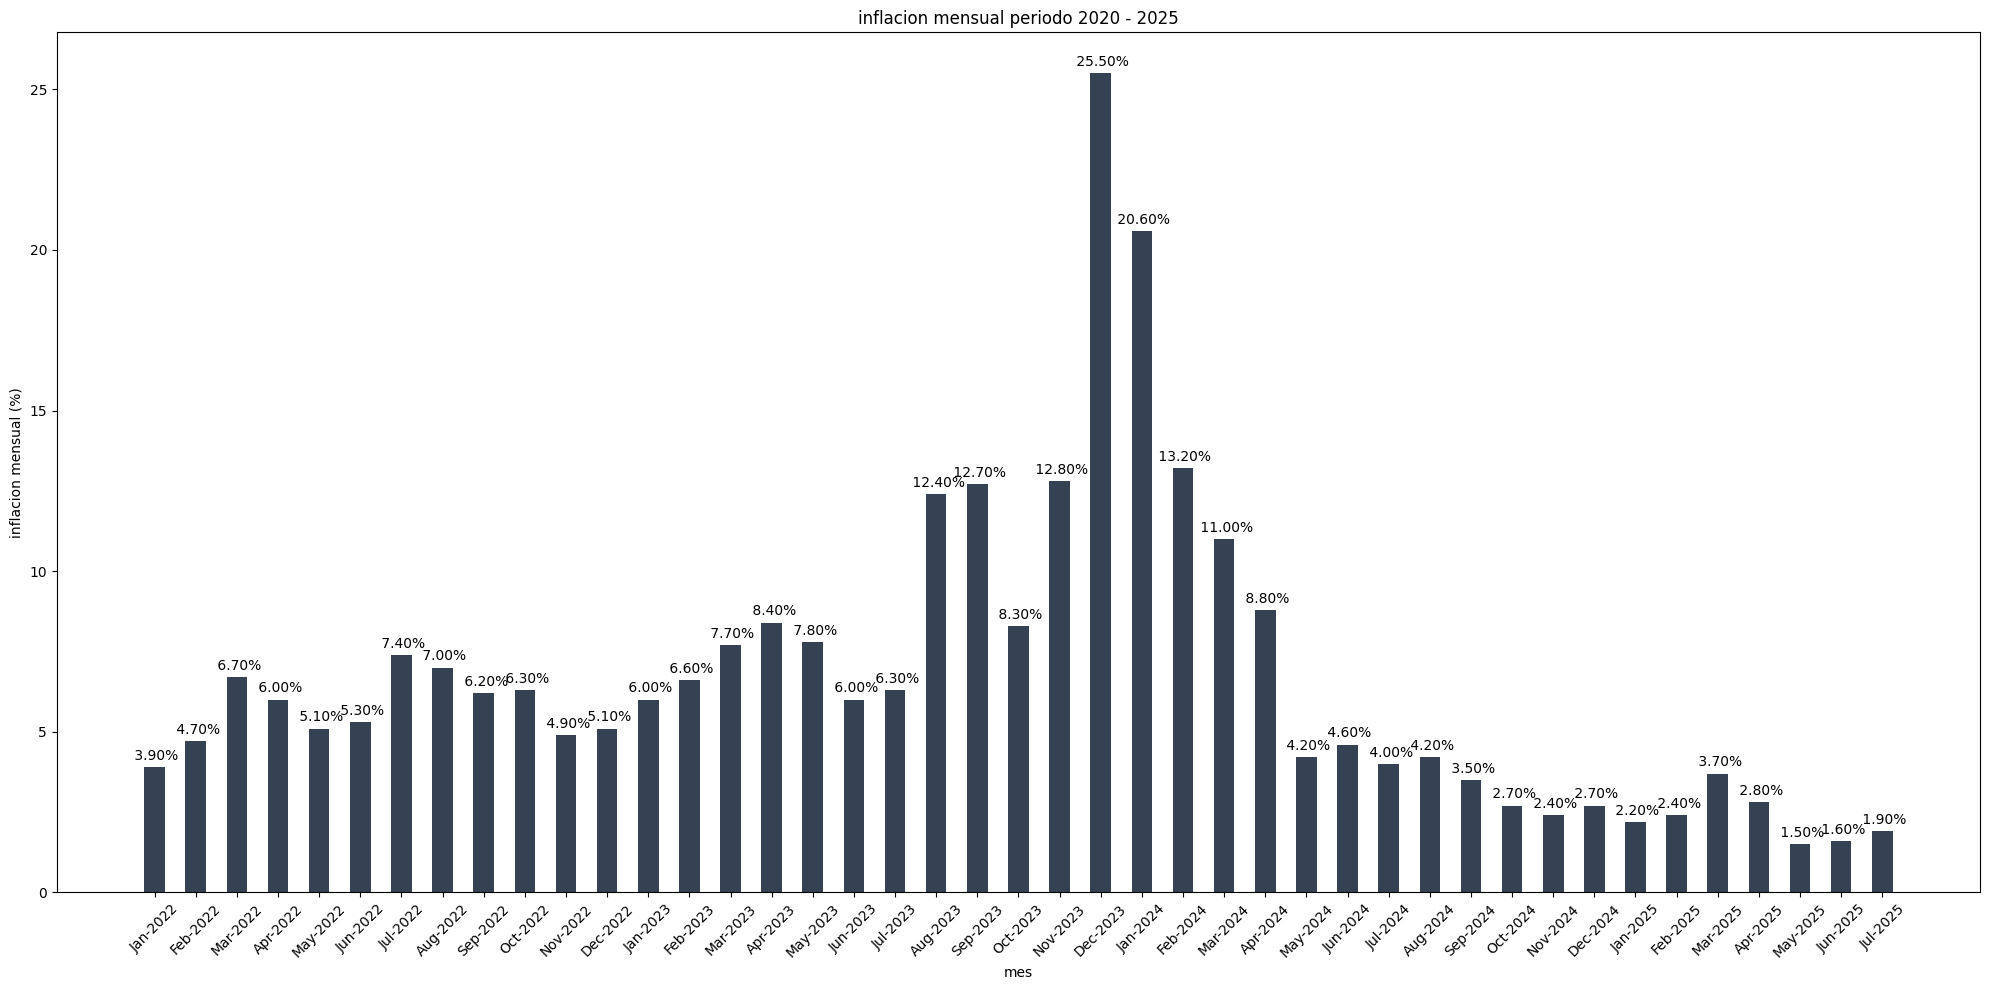

In [93]:
fig, ax= plt.subplots(figsize=(20, 10))

bar = ax.bar(mes_año, inf_mensual,  width=0.5,  color='#344253' )
ax.set_title('inflacion mensual periodo 2020 - 2025')
ax.set_xlabel('mes')
ax.set_ylabel('inflacion mensual (%)')
ax.bar_label(bar, labels= [f"{v: .2f}%" for v in inf_mensual], padding= 3)
ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()